<a href="https://www.kaggle.com/code/risakashiwabara/eda-visitors-year-month?scriptVersionId=151842444" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_month = pd.read_csv('/kaggle/input/japannumber-of-visitors-to-japan/Number of foreign visitors to Japan by month_ .csv')
df_month

,Country/Area,Month,Year,Visitor
0,Afghanistan,Jan.,2017,233
1,Afghanistan,Feb.,2017,196
2,Afghanistan,Mar.,2017,192
3,Afghanistan,Apr.,2017,259
4,Afghanistan,May,2017,228
...,...,...,...,...
17047,Zimbabwe,Aug.,2023,0
17048,Zimbabwe,Sep.,2023,0
17049,Zimbabwe,Oct.,2023,0
17050,Zimbabwe,Nov.,2023,0


In [3]:
df_year = pd.read_csv('/kaggle/input/japannumber-of-visitors-to-japan/Number of foreign visitors to Japan by year_ .csv')
df_year

,Year,Visitor Arrivals
0,1964,352832
1,1965,366649
2,1966,432937
3,1967,476771
4,1968,519004
5,1969,608744
6,1970,854419
7,1971,660715
8,1972,723744
9,1973,784691


# -Details-

In [4]:
df_month.columns

Index(['Country/Area', 'Month ', 'Year', 'Visitor'], dtype='object')

In [5]:
df_year.columns

Index(['Year', 'Visitor Arrivals'], dtype='object')

In [6]:
df_month.describe()

,Year,Visitor
count,17052.000000,1.705200e+04
mean,2020.000000,6.490217e+03
std,2.000059,5.015021e+04
min,2017.000000,0.000000e+00
25%,2018.000000,2.000000e+00
50%,2020.000000,2.100000e+01
75%,2022.000000,1.900000e+02
max,2023.000000,1.050420e+06


In [7]:
df_year.describe()

,Year,Visitor Arrivals
count,60.000000,6.000000e+01
mean,1993.500000,5.570165e+06
std,17.464249,7.306360e+06
min,1964.000000,2.458620e+05
25%,1978.750000,1.036191e+06
50%,1993.500000,3.439251e+06
75%,2008.250000,6.346046e+06
max,2023.000000,3.188205e+07


# Top 10 most visited countries

In [8]:
df_drop = df_month.drop(['Month ','Year'], axis=1)
grouped = df_drop.groupby('Country/Area')
group_sums = grouped.sum()
group_sum = group_sums.reset_index()
df = group_sum
def remove_any_zero_row(df):
    """一つでも0の行を削除"""
    df = df.copy()
    for row in df.index:
        if (df.loc[row] == 0).any():
            df.drop(row, axis=0, inplace=True)
    return df
month_visitor = remove_any_zero_row(df)
month_visitor

,Country/Area,Visitor
0,Afghanistan,16752
1,Albania,1675
2,Algeria,3945
3,Andorra,780
4,Angola,1226
...,...,...
198,Venezuela,6982
199,Vietnam,1957110
200,Yemen,1610
201,Zambia,2611


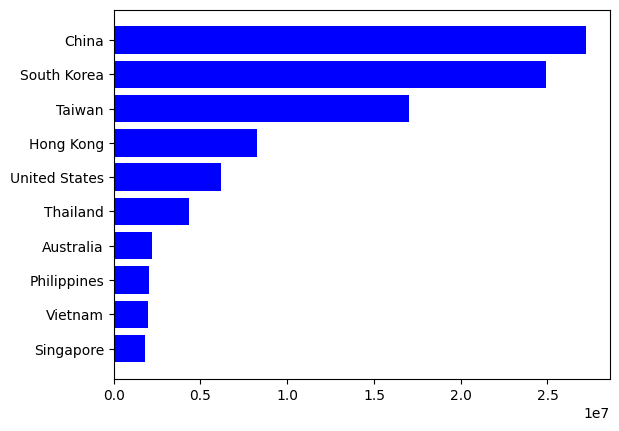

In [9]:
month_visitor = month_visitor.sort_values(['Visitor','Country/Area'])
month_ten = month_visitor[-10:]
height = month_ten['Visitor']
left = month_ten['Country/Area']
plt.barh(left, height, color='b')
plt.show()

# Number of visits per year

<Axes: xlabel='Year'>

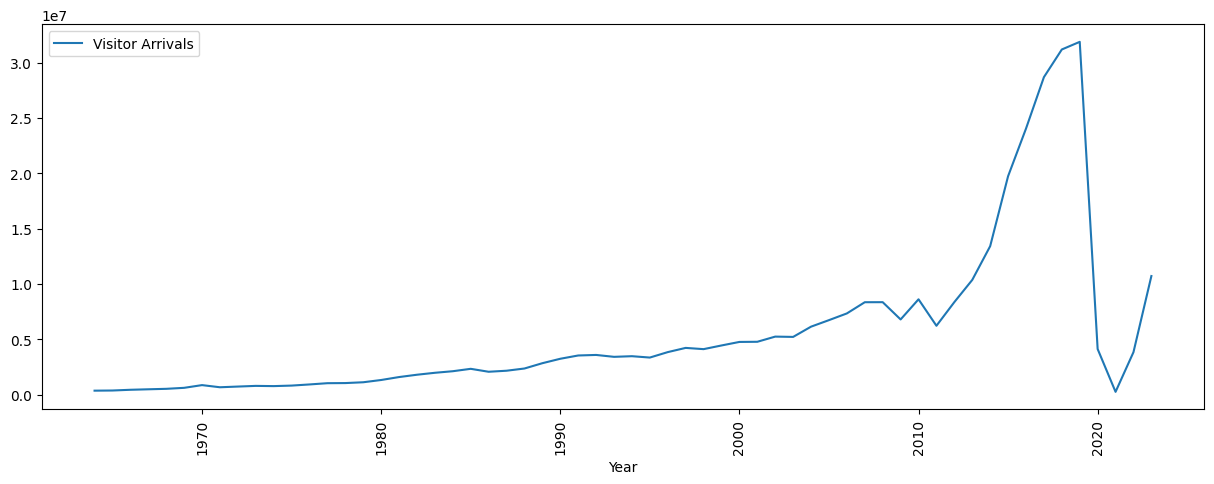

In [10]:
df_y = df_year.set_index('Year')
df_y
plt.figure(figsize=(15,5)) 
plt.xticks(rotation=90) 
sns.lineplot(data=df_y)